**Preparation:** Run (Select the cell and `CTRL+Enter` or `CMD+Enter`) the following code just so that the output looks better.

In [3]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

Whenever you want to add extra cells, you can do that by clicking `+Code` in the upper-left corner, or by clicking `Esc` (stop editting cell) and `A` (add a cell above) or `B` (add a cell below)

# TRUMP TWEETS

President Trump was well known to communicate a lot through Twitter. His tweets got a varying level of engagement, measure either through *Favorites* or *Retweets*. Can we understand what got people engaged, based on the contents of the tweets?

We'll use a subset of the data set prepared by Brendan of https://www.thetrumparchive.com/ , tweets ranging from 2015-06-15 (the day he announced his candidacy) to 2022-01-08 (the dat his account was suspended).

1. **Download the file using the following code**

In [4]:
# The following code downloads the file from GitHub:
!wget https://raw.githubusercontent.com/amjassem/DxU-Intro-to-Text-Analytics/main/Data/trump_tweets.csv

--2022-03-08 23:10:50--  https://raw.githubusercontent.com/amjassem/DxU-Intro-to-Text-Analytics/main/Data/trump_tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6934155 (6.6M) [text/plain]
Saving to: ‘trump_tweets.csv’

trump_tweets.csv    100%[===================>]   6.61M  --.-KB/s    in 0.06s   

2022-03-08 23:10:50 (117 MB/s) - ‘trump_tweets.csv’ saved [6934155/6934155]



This time our data is in a **.csv** format (the less fancy cousin of .xls) you're most likely familiar with it. It's basically a table of tweets and the meta-data.

The `pandas` package is very convenient for working with tables. 
2. **Read the data and see the first few rows**

In [5]:
import pandas as pd

# Read columns 1, 5, 6 and 7. Parse the dates
tweetData = pd.read_csv('trump_tweets.csv', usecols=[1, 5, 6, 7], parse_dates=[3])
# Print top 20 rows
tweetData.head(20)

,text,favorites,retweets,date
0,"""""""@realJoeMurray: Hopefully tomorrow is the d...",68,40,2015-06-16
1,"""""""@brentcfritz: Today is the day America beco...",95,54,2015-06-16
2,"""""""@insuraider: @realDonaldTrump is going to m...",58,32,2015-06-16
3,"""""""@DONJUBBER: @realDonaldTrump Shock the worl...",32,17,2015-06-16
4,"""""""@PianoBecca: @realDonaldTrump No Amercian, ...",33,23,2015-06-16
5,"""""""@isabelsimon80: @realDonaldTrump @brentcfri...",49,23,2015-06-16
6,"""""""@Knight276: @realDonaldTrump @realJoeMurray...",33,19,2015-06-16
7,"""""""@_Snurk: @realDonaldTrump Love it! Always r...",53,26,2015-06-16
8,"""""""@rg_radical99: Counting down the hours to @...",60,33,2015-06-16
9,"""""""@Rhumeey: I really would want to see what A...",54,32,2015-06-16


## Task 1: Clean the texts

Tweets can often be messy to analyze, before we move forward we need to clean them up a bit.

Things to consider:
* Removing url links
* Removing account handles (@account) and emails
* Remove strings that contain numbers
* Removing hashtags?

We might use `re.sub(pattern, '', string)` for this. You can use the [regex cheatsheet](https://cheatography.com/davechild/cheat-sheets/regular-expressions/).

URLs can be fairly-reliably found using the patter `(http|ftp|https)[^\s]*` which looks for http or ftp or https, followed by any number of non-space characters

How about finding account handles?

3. **Finish the function below such that it removes:**
  * URLs, 
  * account handles
  * e-mails
  * strings containing numbers

In [6]:
import re

def CleanText(text):

  # Removes URLs
  text = re.sub('(http|ftp|https)[^\s]*', '', text)
  # Removes account handles
  text = re.sub('@[^\s]*', '', text)
  # Removes emails
  text = re.sub('[^\s]+@[^\s]\.\[^\s]+', '', text)
  # Remove strings with numbers (e.g. "401k")
  text = re.sub('[^\s]*[0-9]+[^\s]*', '', text)

  return text

# Test on a couple of tweets
sel = [40, 95, 976, 32140]

for i in sel:
  print("===================")
  print(tweetData.text[i])
  print(CleanText(tweetData.text[i]))

Speaking to great patriots @MCC_CT. My first visit to Granite State since declaring my candidacy! #FITN https://t.co/HfdDwzjOf0
Speaking to great patriots  My first visit to Granite State since declaring my candidacy! #FITN 
"""@BK00023: Donald Trump's resume backs his run for president http://t.co/KXJPyRPK67 @realDonaldTrump #greta @ThisWeekABC"" Thank you, so true"
""" Donald Trump's resume backs his run for president   #greta  Thank you, so true"
"""@about_life: @realDonaldTrump I Luv America 4 Trump 2016 - Let’s Make America Great Again! - iluvamerica4trump2016@gmail.com"""
"""  I Luv America  Trump  - Let’s Make America Great Again! - 
Your 401k’s will crash with Biden. Massive Biden Tax and Regulation increases will destroy all that you have built! Additionally, 180 Million People will lose their Private Healthcare Plans.
Your  will crash with Biden. Massive Biden Tax and Regulation increases will destroy all that you have built! Additionally,  Million People will lose their Priv

## Task 2: Vectorization

In case of book reviews we performed tokenization ourselves.

If we don't want to include any special rules, or if we already did all the "custom" changes (like above) we can use a package for this. This is often much faster to compute actually.

We'll run `CountVectorizer()`. Notice that the vocabulary is still a bit messy. It can usually be improved by setting a minimum count for terms to be included using the `min_df=` argument in `CountVectorizer()`. 

You can find out more options (arguments) by running `?CountVectorizer`.

4. **First run the code below**
  * Then set a minumum count, and re-run the code, see how the vocabulary changes?

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Get the text of the tweets
texts = [CleanText(text) for text in tweetData.text]

# The object for vectorizing the corpus
vecCounts = CountVectorizer(min_df=10, stop_words='english')
# Vectorize the corpus
counts = vecCounts.fit_transform(texts)

# Print the vocabulary
vocabulary = vecCounts.get_feature_names_out()
print('Number of terms:', len(vocabulary))
print(vocabulary[0:100])

Number of terms: 4212
['abandon' 'abandoned' 'abc' 'abe' 'ability' 'able' 'abolish' 'abortion'
 'abraham' 'absentee' 'absolute' 'absolutely' 'abuse' 'abused' 'abuses'
 'accept' 'acceptable' 'accepted' 'accepting' 'access' 'accident'
 'accomplished' 'accomplishments' 'accord' 'according' 'account'
 'accountability' 'accountable' 'accounts' 'accurate' 'accurately'
 'accusations' 'accused' 'achieve' 'achieved' 'achievement' 'acid'
 'acknowledge' 'act' 'acted' 'acting' 'action' 'actions' 'active'
 'activists' 'activities' 'activity' 'acts' 'actual' 'actually' 'ad'
 'adam' 'adams' 'add' 'added' 'adding' 'addition' 'additional'
 'additionally' 'address' 'adds' 'admin' 'administration'
 'administrations' 'admiral' 'admit' 'admits' 'admitted' 'admitting' 'ads'
 'adult' 'adults' 'advance' 'advanced' 'advantage' 'advertising' 'advice'
 'adviser' 'advisor' 'advisory' 'advocate' 'affairs' 'affected'
 'affordable' 'afghanistan' 'afraid' 'african' 'afternoon' 'ag' 'age'
 'agencies' 'agency' 'agenda'

## Task 3: Topic modelling

Let's run a topic model to try to find out what the tweets are about.

Select a number of topics `n_components=` and the number of iterations `max_iter=` (for now, let's choose a small number, e.g. 10 - when you run an actual analysis it's best to stop through convergence).

By setting `verbose=1` we can see the progress of the estimation.

5. **Fill in the missing code and run it**

In [8]:
from sklearn.decomposition import LatentDirichletAllocation
from tqdm.notebook import tqdm

# Initialize the model
lda = LatentDirichletAllocation(n_components=15, max_iter=10, verbose=1)
# Estimate the parameters
proportions = lda.fit_transform(counts)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


Let's see what topics we estimated. A convenient way to do this is to create a wordcloud for each topic.

6. **Run the following code.**
  * Do the topic distributions have a clear interpretation?

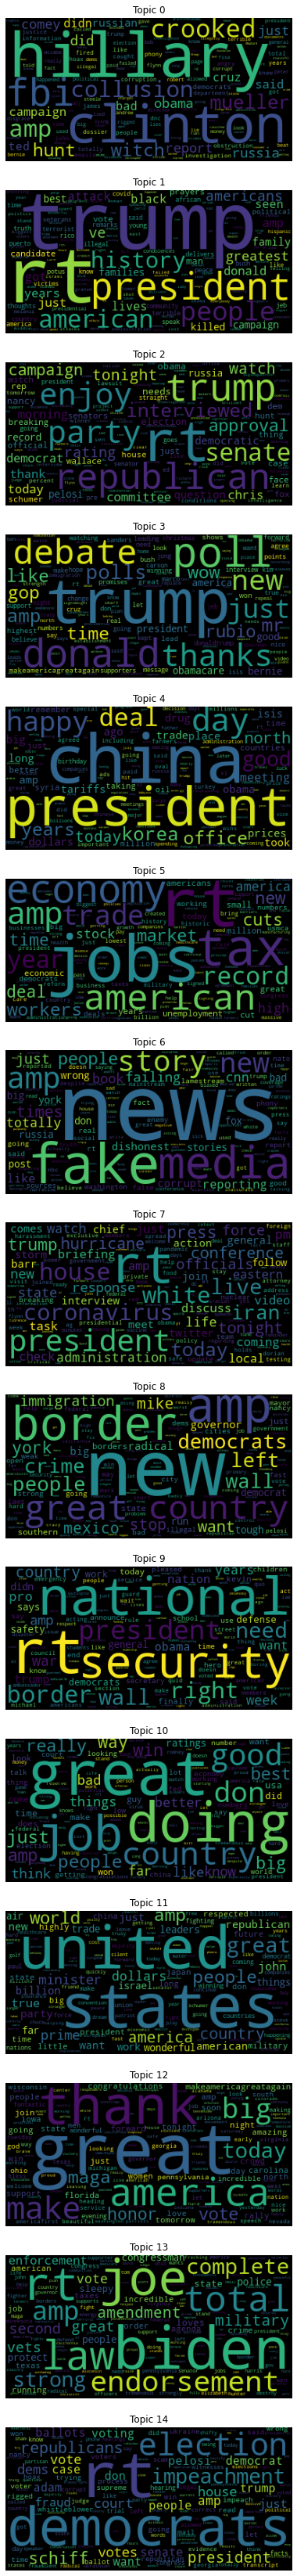

In [9]:
from matplotlib import pyplot as plt
import numpy as np
from wordcloud import WordCloud

nTerm = 150

# Initialize the subplots
nTop = lda.n_components
fig, axs = plt.subplots(nTop, figsize=(8, 4*nTop))

for k in range(nTop):
  
  # Find top terms for each topic
  sel = np.argsort(-lda.components_[k])[0:nTerm]
  topic = [(vocabulary[i], lda.components_[k, i]) for i in sel]
  topic = dict(topic)

  # Create a wordcloud and plot it
  wordcloud = WordCloud(prefer_horizontal=1).generate_from_frequencies(topic)
  axs[k].set_title("Topic " + str(k))
  axs[k].imshow(wordcloud)
  axs[k].axis("off")

## Task 4: Predict retweets

Can we perhaps use the estimated topics to predict the number of retweets/favorites? Try estimating a regression model.

First however, it would make sense to transform the retweets.

7. **Build a model of your choice using the methods we've used for book reviews.**

In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

retweets = np.log(tweetData.retweets + 1)

# Scale the data so that it has equal st. dev.
scaler = StandardScaler()
X = scaler.fit_transform(proportions)

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, retweets,
                                                    test_size=0.33, random_state=1)

# Select values of alpha
alphas = [5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1]

for alpha in tqdm(alphas):

  # Run a model
  clf = linear_model.Lasso(alpha=alpha)
  clf.fit(X_train, y_train)

  # Print the R^2:
  score = clf.score(X_test, y_test)
  print()

  # Print the number of selected variables:
  nSelected = (clf.coef_ != 0).sum()
  print('alpha:', alpha, 'R^2:', score, 'Variables selected:', nSelected)

  0%|          | 0/6 [00:00<?, ?it/s]


alpha: 0.0005 R^2: 0.1193923535522664 Variables selected: 14

alpha: 0.001 R^2: 0.11941205420710643 Variables selected: 14

alpha: 0.005 R^2: 0.11943830069450045 Variables selected: 14

alpha: 0.01 R^2: 0.11911566239953675 Variables selected: 14

alpha: 0.05 R^2: 0.10524706500681036 Variables selected: 8

alpha: 0.1 R^2: 0.08257655241059403 Variables selected: 3


Once you've selected a suitable model, you can re-do the wordclouds but include in the title the estimated coefficient for that topic:
* `axs[k].set_title("Topic " + str(k) + "Coef.: " + "{:.2f}".format(clf.coef_[i]))`
* You can also try printing them out in order based on the value of the coefficients.

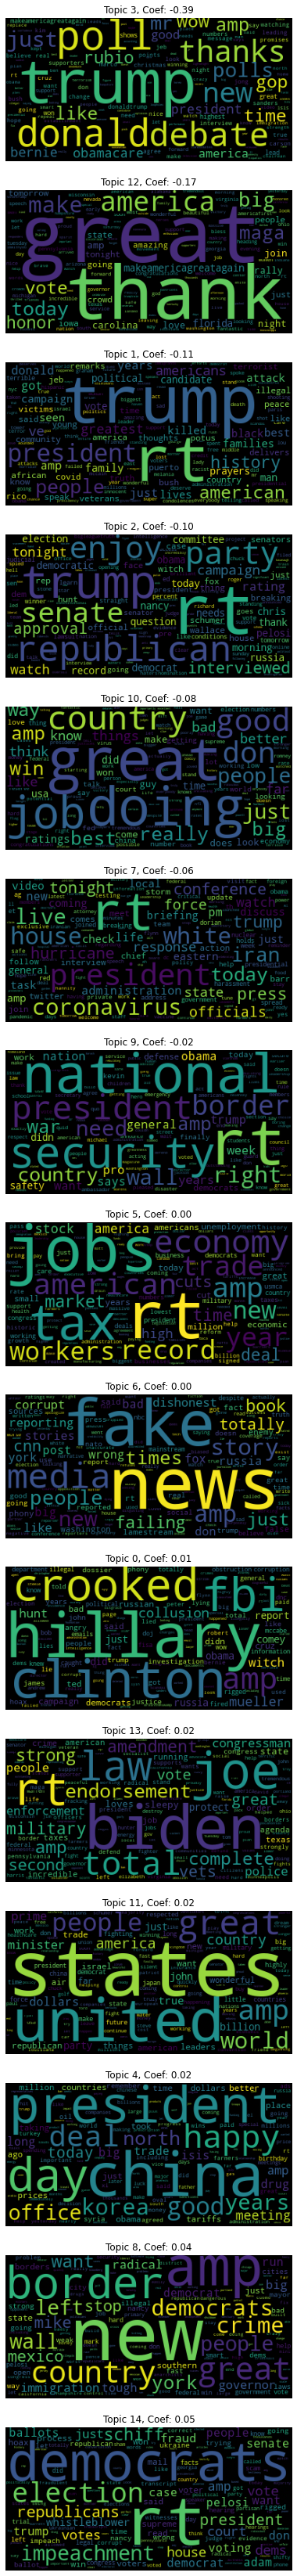

In [12]:
clf = linear_model.Lasso(alpha=5e-3)
clf.fit(X, retweets)

nTerm = 150

# Initialize the subplots
nTop = lda.n_components
fig, axs = plt.subplots(nTop, figsize=(8, 4*nTop))

for n, k in enumerate(np.argsort(clf.coef_)):
  
  # Find top terms for each topic
  sel = np.argsort(-lda.components_[k])[0:nTerm]
  topic = [(vocabulary[i], lda.components_[k, i]) for i in sel]
  topic = dict(topic)

  # Create a wordcloud and plot it
  wordcloud = WordCloud(prefer_horizontal=1).generate_from_frequencies(topic)
  axs[n].set_title("Topic " + str(k) + ", Coef: " + "{:.2f}".format(clf.coef_[k]))
  axs[n].imshow(wordcloud)
  axs[n].axis("off")